# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_save_file`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**,
- please also submit the file that contains your trained model.
    - use `saveModel` to put your final, trained model in this file
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the name of the file in which the model was saved
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


In [ ]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path):
    """
    Save a model

    Parameters
    ----------
    model: a Keras model object
    model_path: String.  Relative path to a file in which the model will be stored


    Returns
    -------
    model_save_file: String.  Name of the file in which the model has been saved
        - this will be model_path with the proper file-extension added
    """

    model_save_file = model_path + '.keras'

    model.save(model_save_file)

    print(f"Model saved in {model_save_file:s}; submit with your assignment.")

    return model_save_file

def loadModel(model_save_file):
    model = tf.keras.models.load_model( model_save_file )

    return model

def MyModel(test_dir, model_save_file):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_save_file)

    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []

    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    ids = []

    # YOUR CODE GOES HERE


    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
my_model = None # CHANGE None to your model !

# model_save_file = saveModel(my_model, model_path)

# 0. Constants

In [1]:
from typing import Final

DATASET_URL: Final = "https://github.com/rogerli2020/Stock-Prediction-FRE7773-Final-Project/raw/refs/heads/main/Data.tar"
DATA_RELATIVE_PATH: Final = "./Data"
TRAIN_SET_RELATIVE_PATH: Final = "./Data/train"
SAMPLE_SET_RELATIVE_PATH: Final = "./Data/sample"

# 1. Getting and Loading the Data

In [2]:
from typing import Dict
import os
import urllib.request
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

class MyDataset:
  def __init__(self, download_anyway: bool = False) -> None:
    self.train_set : Dict[str, pd.DataFrame] = None
    self.sample_set : Dict[str, pd.DataFrame] = None

    self._download_anyway = download_anyway

    self._load_dataset()

  def _load_dataset(self):
    def load_dataset_from_dir(dir : str) -> dict:
      data_dict = {}
      if not os.path.isdir(dir):
        raise ValueError(f"The provided path '{dir}' is not a directory or does not exist.")
      for file_name in os.listdir(dir):
        if file_name.endswith(".csv"):
          file_path = os.path.join(dir, file_name)
          key = os.path.splitext(file_name)[0]
          try:
            data_dict[key] = pd.read_csv(file_path)
            data_dict[key]['Dt'] = pd.to_datetime(data_dict[key]['Dt'])
            data_dict[key] = data_dict[key].set_index('Dt')
          except Exception as e:
            print(f"Error reading {file_name}: {e}")
      return data_dict

    self._download_dataset()
    self.train_set = load_dataset_from_dir(TRAIN_SET_RELATIVE_PATH)
    self.sample_set = load_dataset_from_dir(SAMPLE_SET_RELATIVE_PATH)
    assert isinstance(self.train_set, dict) and len(self.train_set) > 0, "train_set must be a non-empty dictionary"
    assert isinstance(self.sample_set, dict) and len(self.sample_set) > 0, "sample_set must be a non-empty dictionary"
    print("Dataset loaded!")

  def _download_dataset(self):
    if os.path.isdir(DATA_RELATIVE_PATH) and not self._download_anyway:
      print("Data already exist... Skipping download.")
      return
    try:
      tar_file_path, _ = urllib.request.urlretrieve(DATASET_URL)
      with tarfile.open(tar_file_path, "r") as tar:
          tar.extractall()
    except Exception as e:
      print(f"An error occurred during download or extraction: {e}")
    finally:
      if os.path.exists(tar_file_path):
        os.remove(tar_file_path)

  @staticmethod
  def graph_dataset_df(dataset : pd.DataFrame):
    plt.figure(figsize=(8, 5))

    # Plot each column
    for column in dataset.columns:
        plt.plot(dataset.index, dataset[column], label=column)

    # Set title, labels, and grid
    plt.title("Graph")
    plt.xlabel("Date")
    plt.ylabel("Values")

    # Format x-axis to show Year only
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Tick every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'Year'

    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

dataset : MyDataset = MyDataset(download_anyway=True)

Dataset loaded!


# 2. Trying to Understand the Data

Shape of Data:

In [ ]:
print(dataset.train_set['AAPL'].shape)
print(dataset.sample_set['AAPL'].shape)

(4277, 8)
(251, 8)


In [ ]:
dataset.sample_set['AAPL'].head()

,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,
2017-01-03,110.9418,116.15,0.0,1.0,116.3300,114.76,115.80,28781865.0
2017-01-04,110.8176,116.02,0.0,1.0,116.5100,115.75,115.85,21118116.0
2017-01-05,111.3812,116.61,0.0,1.0,116.8642,115.81,115.92,22193587.0
2017-01-06,112.6229,117.91,0.0,1.0,118.1600,116.47,116.78,31751900.0
2017-01-09,113.6545,118.99,0.0,1.0,119.4300,117.94,117.95,33561948.0


### 2.1 Features:

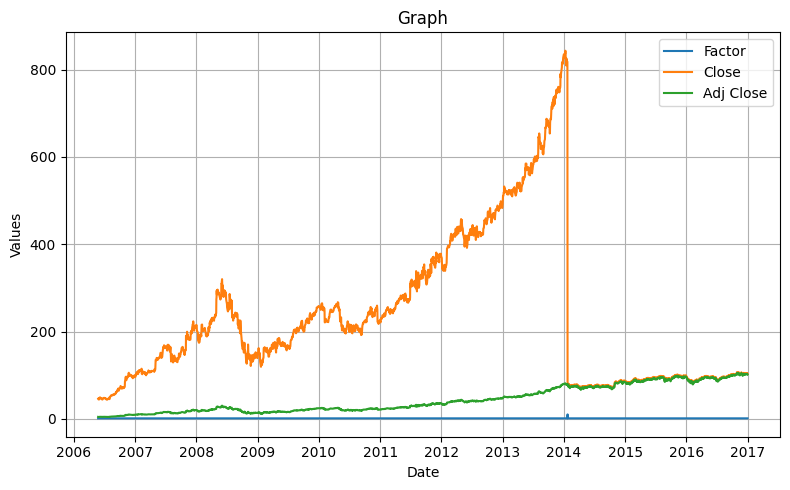

In [ ]:
MyDataset.graph_dataset_df(dataset.train_set['MA'][['Factor', 'Close', 'Adj Close']])

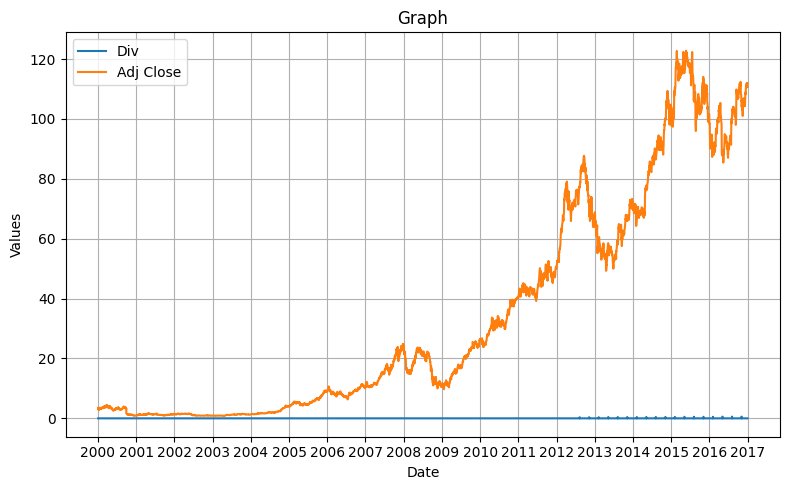

In [ ]:
MyDataset.graph_dataset_df(dataset.train_set['AAPL'][['Div', 'Adj Close']])

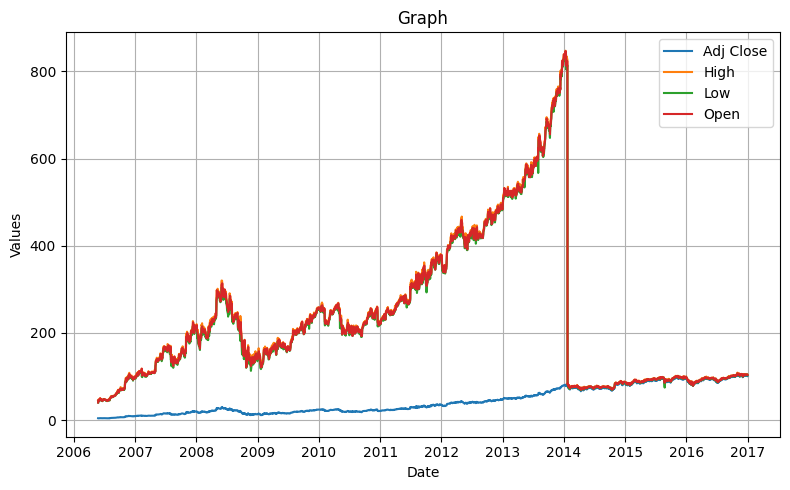

In [ ]:
MyDataset.graph_dataset_df(dataset.train_set['MA'][['Adj Close', 'High', 'Low', 'Open']])

# 3. Exploratory Data Analysis and Feature Engineering

## 3.1 Features: Log Return (float) and Positive Return (bool)

* Daily return is calculated as
```np.log1p(df['Adj Close'].pct_change())```
which is the log return of the stock today based on today and yesterday's closing prices alone.

In [3]:
import numpy as np
import math

class FeatureCreator:
  @staticmethod
  def create_feature_for_all_stocks(dataset : MyDataset, func : callable):
    """
      Apply the function to all stocks in the dataset.
    """
    for dataset_dict in [dataset.train_set, dataset.sample_set]:
      for ticker, df in dataset_dict.items():
        dataset_dict[ticker] = func(df)

  @staticmethod
  def create_return_column_for_single_stock(df : pd.DataFrame):
    df['Return'] = np.log1p(df['Adj Close'].pct_change())
    df.dropna(subset=['Return'], inplace=True)
    return df

  @staticmethod
  def create_volatility_column_for_single_stock(df : pd.DataFrame):
    def garman_klass(price_data, window=3, trading_periods=252, clean=False):
      # taken from https://www.pyquantnews.com/the-pyquant-newsletter/how-to-compute-volatility-6-ways
      log_hl = (price_data["High"] / price_data["Low"]).apply(np.log)
      log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)
      rs = 0.5 * log_hl ** 2 - (2 * math.log(2) - 1) * log_co ** 2
      def f(v):
        return (trading_periods * v.mean()) ** 0.5
      result = rs.rolling(window=window, center=False).apply(func=f)
      result.bfill(inplace=True)
      return result

    df['Volatility'] = garman_klass(df)
    return df

  @staticmethod
  def create_positive_return_column_for_single_stock(df : pd.DataFrame):
    """
      Get the daily log returns based on Adj Close.
    """
    df['Positive Return'] = np.where(df['Return'] > 0, 1, 0)
    return df

  @staticmethod
  def create_absolute_return_column_for_single_stock(df : pd.DataFrame):
    """
      Get the daily log returns based on Adj Close.
    """
    df['Absolute Return'] = df['Return'].abs()
    return df

In [4]:
# Creating return column for all stocks in the dataset.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_return_column_for_single_stock
)

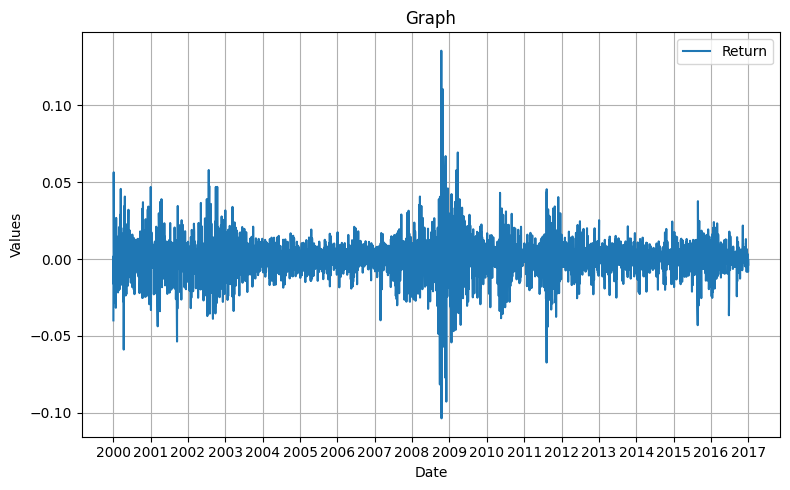

In [5]:
# Visualizing the returns for SPY.
MyDataset.graph_dataset_df(dataset.train_set['SPY'][['Return']])

In [6]:
# Creating the Positive Return column for all stocks.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_positive_return_column_for_single_stock
)

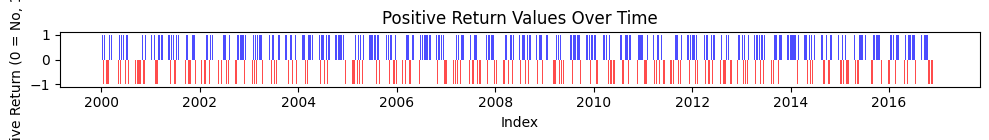

In [7]:
# Visualizing the Positive Return column for SPY.
transformed_values = dataset.train_set['SPY']['Positive Return'].replace({0: -1, 1: 1})
plt.figure(figsize=(10, 1.5))
plt.bar(dataset.train_set['SPY'].index, transformed_values, color=['red' if x == -1 else 'blue' for x in transformed_values], alpha=0.7)
plt.title('Positive Return Values Over Time')
plt.xlabel('Index')
plt.ylabel('Positive Return (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

In [8]:
# Creating the volatility column for all stocks.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_volatility_column_for_single_stock,
)

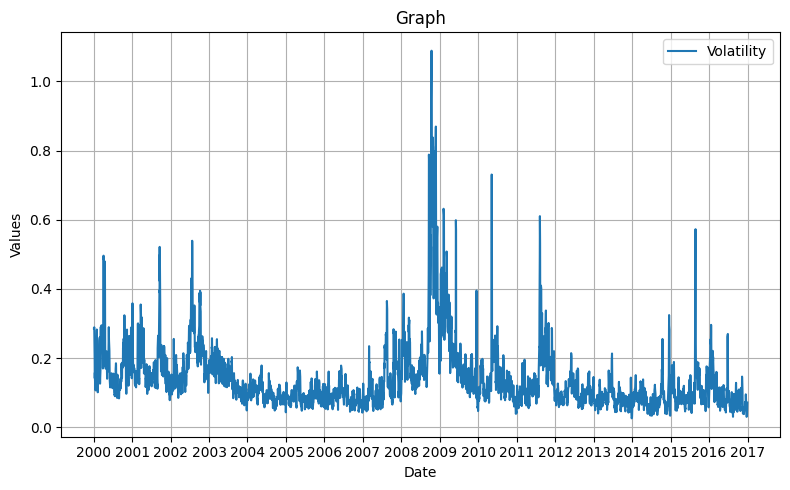

In [9]:
# Graph SPY's volatility
MyDataset.graph_dataset_df(dataset.train_set['SPY'][['Volatility']])


In [10]:
# Creating the Absolute Return column for all stocks.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_absolute_return_column_for_single_stock,
)

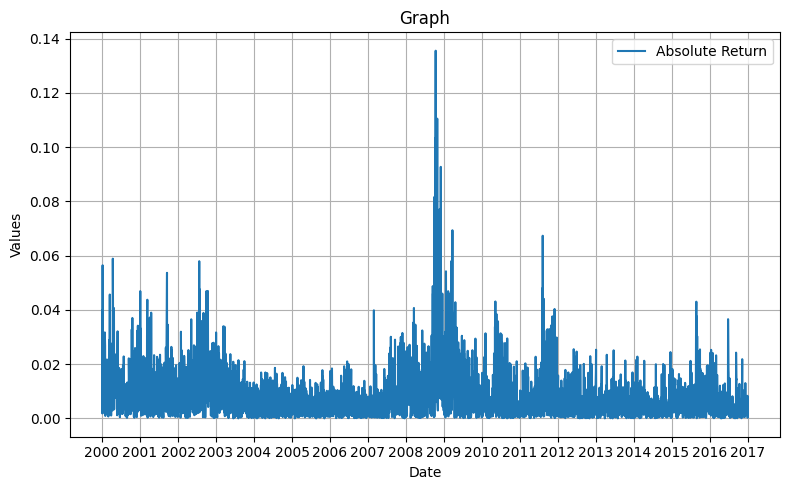

In [11]:
# Graph SPY's volatility
MyDataset.graph_dataset_df(dataset.train_set['SPY'][['Absolute Return']])

## 3.2 Autocorrelation Analysis!

- Get a sense of the autocorrelation for Returns and Volatility
- As can be seen below, volatility has high autocorrelation! which is expected, and implies that it's suitable for GARCH

In [67]:
returns = dataset.train_set['SPY']['Return']
print('Return:')
print([returns.autocorr(lag) for lag in range(1, 11)])
volatility = dataset.train_set['SPY']['Volatility']
print('Volatility:')
print([volatility.autocorr(lag) for lag in range(1, 11)])

Return:
[-0.06341104423275877, -0.06683383319260607, 0.011481822454585271, -0.004267713108093837, -0.039114010578752016, -0.0013576821824413767, -0.016158033295313807, 0.01932666701475728, -0.018576276097050173, 0.006215832852123406]
Volatility:
[0.9310519082142076, 0.8467132861441267, 0.760795193172249, 0.7395915829281764, 0.7288696945365623, 0.7236258452142338, 0.7172342693885843, 0.7044943298112298, 0.6878178332035515, 0.6706639714289511]


## 3.3 Testing with GARCH(p,q) for volatility forecast

In [14]:
# Experiment with GARCH model.
# Download and import relevant GARCH modules.
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 13.5 MB/s eta 0:00:00


MSE = 0.9616407566650442


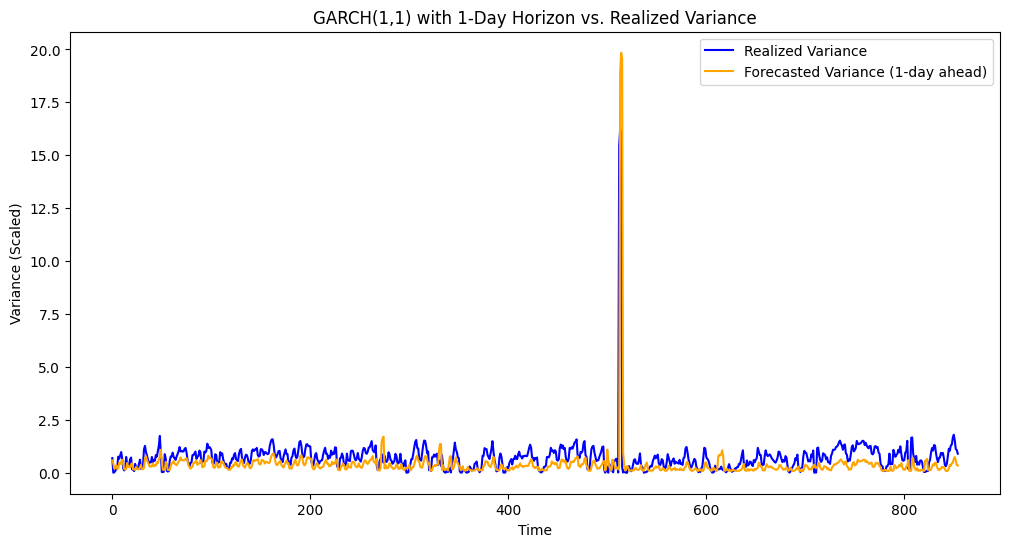

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.preprocessing import StandardScaler

data = dataset.train_set['AAPL']['Volatility'].to_frame()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data
split_idx = int(len(scaled_data) * 0.8)
train_data = scaled_data[:split_idx]
test_data = scaled_data[split_idx:]

# Step 4: Initialize rolling forecast
rolling_forecast_variance = []
history = train_data.flatten().tolist()

for actual in test_data.flatten():
  model = arch_model(history, vol='Garch', p=1, q=1, dist='normal')
  model_fit = model.fit(disp='off')

  # Forecast 1 step ahead
  forecast = model_fit.forecast(horizon=1)
  rolling_forecast_variance.append(forecast.variance.values[-1, 0])

  # Update history with the actual value
  history.append(actual)

# Step 5: Plot the results
# Convert variance forecasts and actual squared returns back to readable scales
rolling_forecast_variance = np.array(rolling_forecast_variance)
realized_measures = test_data.flatten() ** 2

print(f'''MSE = {
    np.mean((rolling_forecast_variance - realized_measures) ** 2)
}''')

plt.figure(figsize=(12, 6))
plt.plot(realized_measures, label='Realized Variance', color='blue')
plt.plot(rolling_forecast_variance, label='Forecasted Variance (1-day ahead)', color='orange')
plt.title('GARCH(1,1) with 1-Day Horizon vs. Realized Variance')
plt.xlabel('Time')
plt.ylabel('Variance (Scaled)')
plt.legend()
plt.show()


seems like GARCH(1,1) is generally following the trends for r^2 and is able to predict peaks for out of sample data on a rolling basis!

# 4. Exploration: GARCH Model Rolling Forecast for Next-Day Volatility

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.preprocessing import StandardScaler

class GARCHManager:
  def __init__(self, dataset: 'MyDataset', p: int = 1, q: int = 1):
    self.p = p
    self.q = q
    self._dataset = dataset
    self.garch_models = {}
    self.scalers = {}

  def fit_garch_for_single_stock(self, ticker: str):
    data = self._dataset.train_set[ticker]['Volatility'].to_frame()

    # Scale data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    train_data = scaled_data.flatten().tolist()

    # Fit GARCH model
    model = arch_model(train_data, vol='Garch', p=self.p, q=self.q, dist='normal')
    model_fit = model.fit(disp='off')

    # print(f'GARCH model fitted for {ticker}!')
    return model_fit, scaler

  def fit_garch_for_all_stocks(self):
    for ticker in self._dataset.train_set.keys():
      model, scaler = self.fit_garch_for_single_stock(ticker)
      self.garch_models[ticker] = model
      self.scalers[ticker] = scaler

  def get_in_sample_garch_values_for_single_stock(self, ticker: str):
    data = self._dataset.train_set[ticker]['Volatility'].to_frame()
    scaler = self.scalers[ticker]
    scaled_data = scaler.transform(data)
    scaled_data_flat = scaled_data.flatten()
    model_fit = self.garch_models[ticker]
    fitted_variances = model_fit.conditional_volatility

    return fitted_variances

  def get_out_of_sample_garch_values_for_single_stock(self, ticker: str):
    data = self._dataset.sample_set[ticker]['Volatility'].to_frame()
    scaler = self.scalers[ticker]
    scaled_data = scaler.transform(data)
    scaled_data_flat = scaled_data.flatten()

    rolling_forecast_variance = []

    train_scaled = scaler.transform(
      self._dataset.train_set[ticker]['Volatility'].to_frame()
    ).flatten()
    history = train_scaled.tolist()

    for actual in scaled_data_flat:
      model = arch_model(history, vol='Garch', p=self.p, q=self.q, dist='normal')
      model_fit = model.fit(disp='off')

      # Forecast the next variance
      forecast = model_fit.forecast(horizon=1)
      rolling_forecast_variance.append(forecast.variance.values[-1, 0])

      # Update history with the new data point
      history.append(actual)

    rolling_forecast_variance = np.array(rolling_forecast_variance)
    variance_proxy = scaled_data_flat ** 2

    mse = np.mean((rolling_forecast_variance - variance_proxy) ** 2)
    print(f"MSE = {mse}")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(variance_proxy, label='Realized Variance Estimate (r^2)', color='blue')
    plt.plot(rolling_forecast_variance, label='Forecasted Variance (1-day ahead)', color='orange')
    plt.title(f'GARCH({self.p},{self.q}) with 1-Day Horizon vs. Realized Variance Estimate')
    plt.xlabel('Time')
    plt.ylabel('Variance (Scaled)')
    plt.legend()
    plt.show()
    return rolling_forecast_variance

  def get_in_sample_garch_values_for_all_stocks(self):
    """
      Get in sample garch values for all stocks, and append the results to their respective dataframe in self._dataset
      name the new column GARCH_VOL
    """
    for ticker in self._dataset.train_set.keys():
      garch_values = self.get_in_sample_garch_values_for_single_stock(ticker)
      self._dataset.train_set[ticker]['GARCH_VOL'] = garch_values ** 0.5

  def get_out_of_sample_garch_values_for_all_stocks(self):
      """
        Get out of sample garch values for all stocks, and append the results to their respective dataframe in self._dataset
        name the new column GARCH_VOL
      """
      counter = len(self._dataset.sample_set.keys())
      for ticker in self._dataset.sample_set.keys():
        print(f'[{counter} Remaining] Getting out-of-sample GARCH Forecast for {ticker}...')
        counter -= 1
        garch_values = self.get_out_of_sample_garch_values_for_single_stock(ticker)
        self._dataset.sample_set[ticker]['GARCH_VOL'] = garch_values ** 0.5



[24 Remaining] Getting out-of-sample GARCH Forecast for XLB...
MSE = 0.30617429911368554


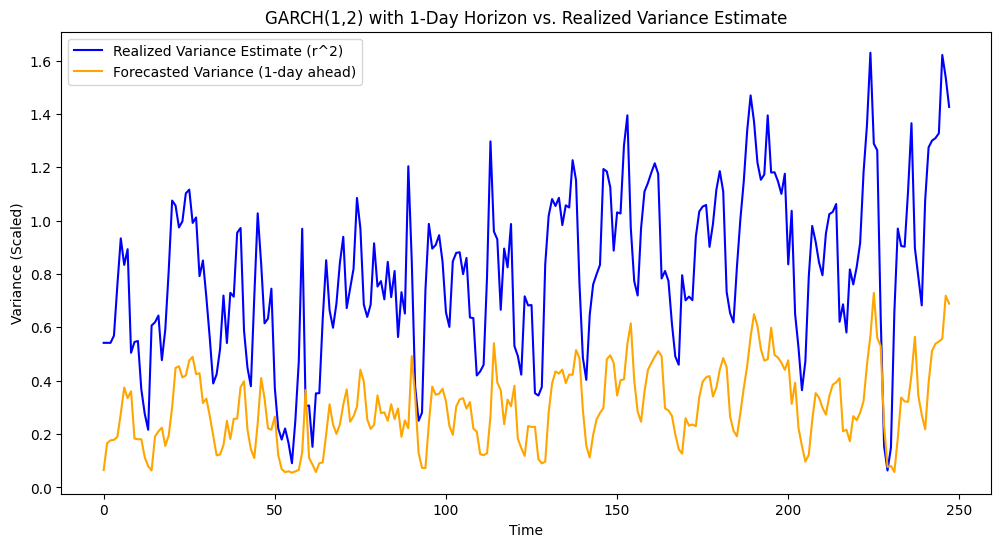

[23 Remaining] Getting out-of-sample GARCH Forecast for IBM...
MSE = 0.33966131431326685


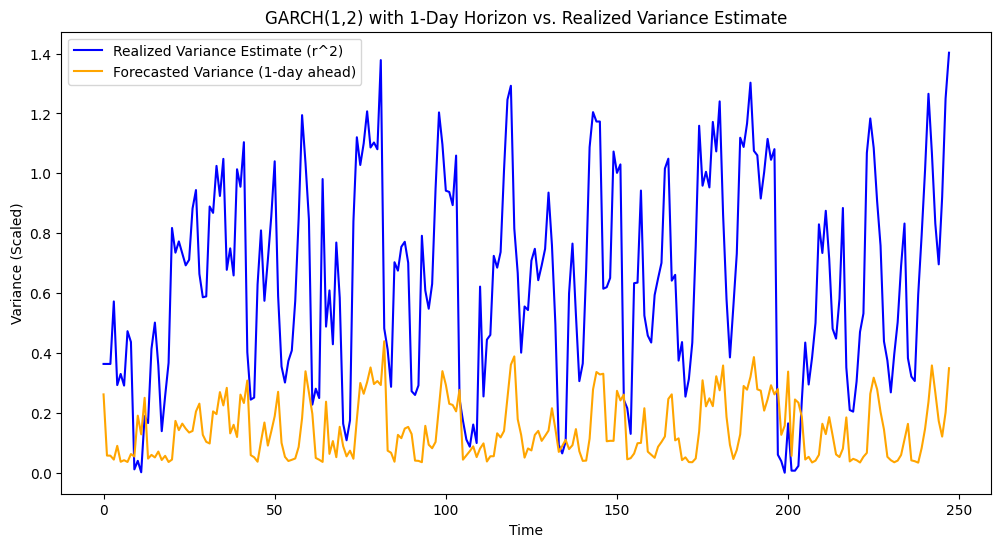

[22 Remaining] Getting out-of-sample GARCH Forecast for V...
MSE = 0.24298565204655642


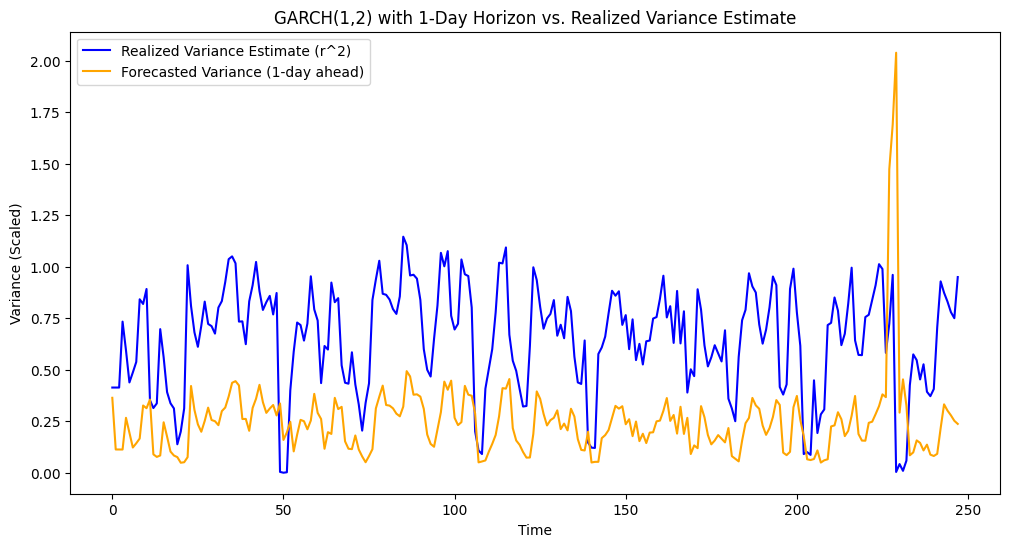

[21 Remaining] Getting out-of-sample GARCH Forecast for GOOG...
MSE = 0.386108262424346


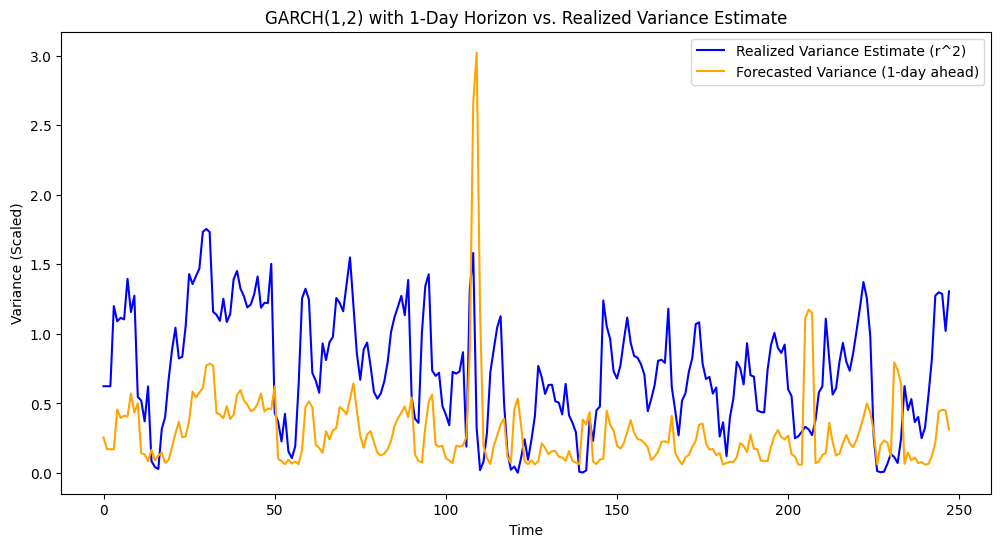

[20 Remaining] Getting out-of-sample GARCH Forecast for AAPL...
MSE = 0.6507150524026647


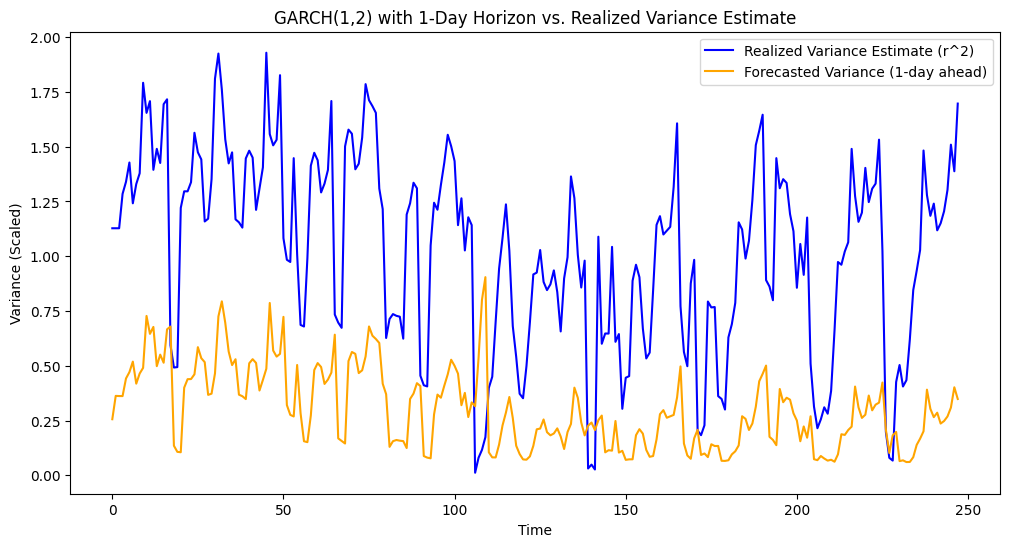

[19 Remaining] Getting out-of-sample GARCH Forecast for INTC...
MSE = 0.43840371481804147


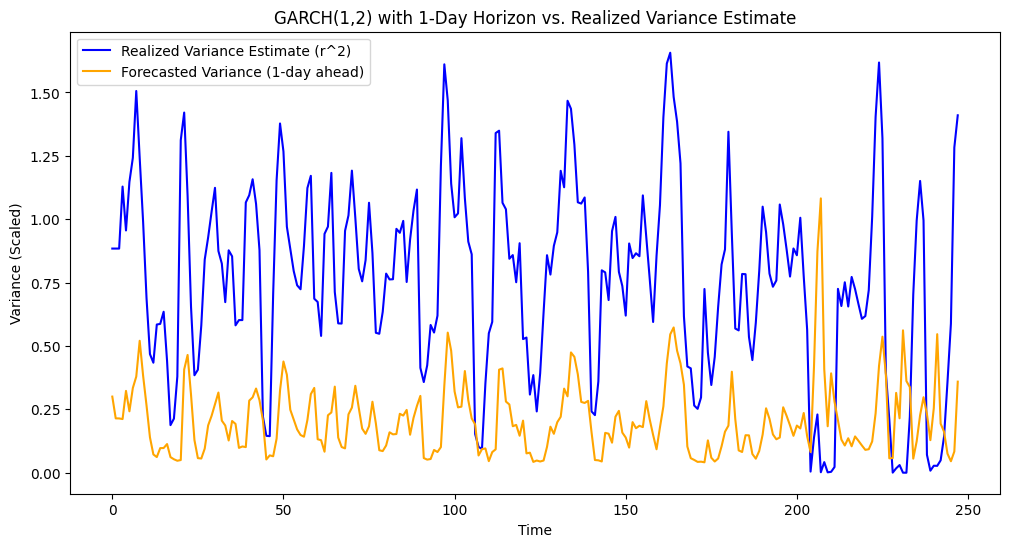

[18 Remaining] Getting out-of-sample GARCH Forecast for XLP...
MSE = 0.24069729747847607


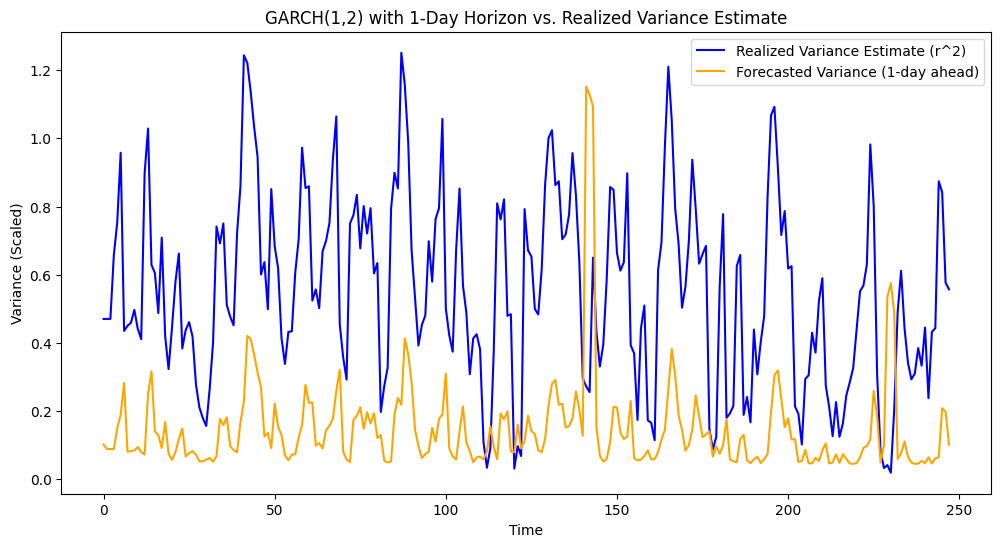

[17 Remaining] Getting out-of-sample GARCH Forecast for XLE...
MSE = 0.1606938517971648


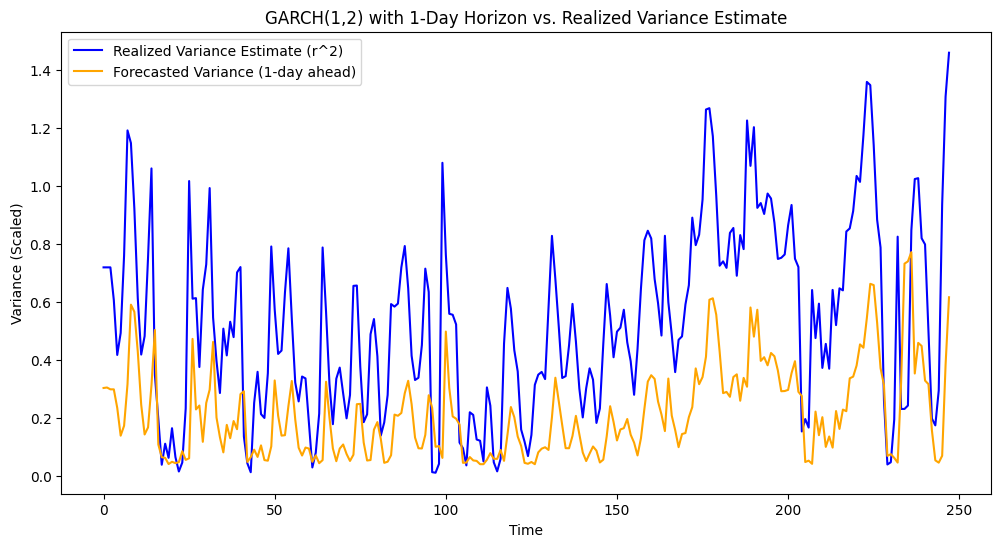

[16 Remaining] Getting out-of-sample GARCH Forecast for FB...
MSE = 0.5777435465652746


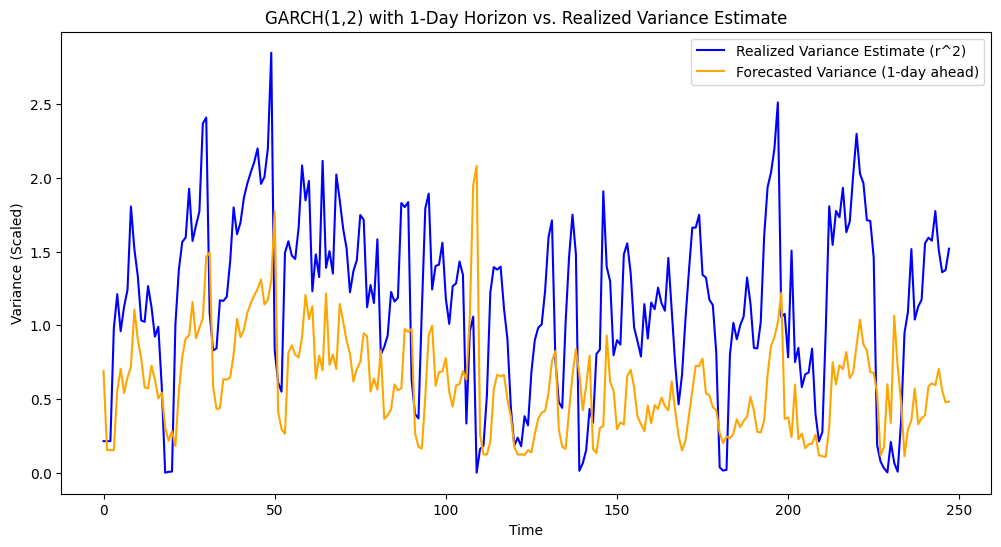

[15 Remaining] Getting out-of-sample GARCH Forecast for XLI...
MSE = 0.3728701329389538


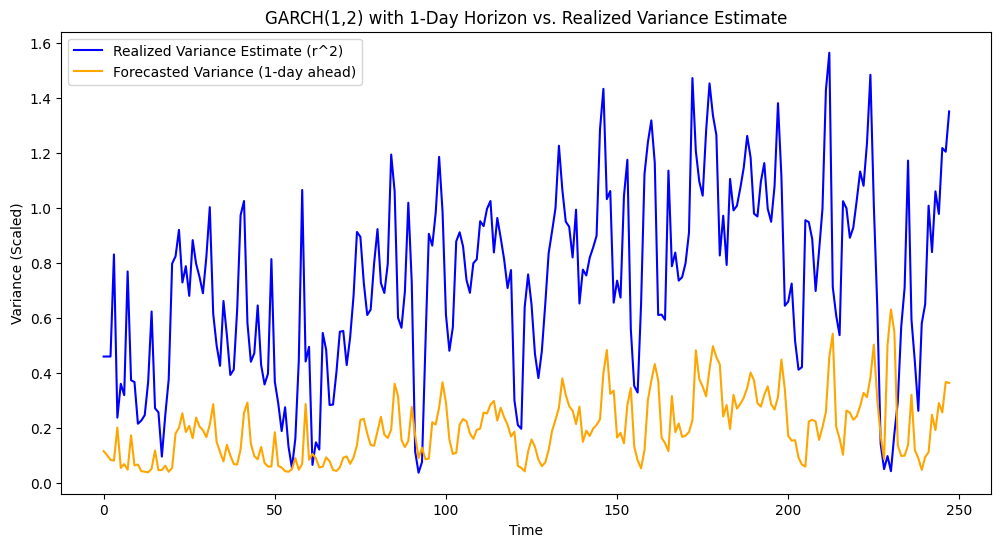

[14 Remaining] Getting out-of-sample GARCH Forecast for CSCO...
MSE = 0.4227713370894152


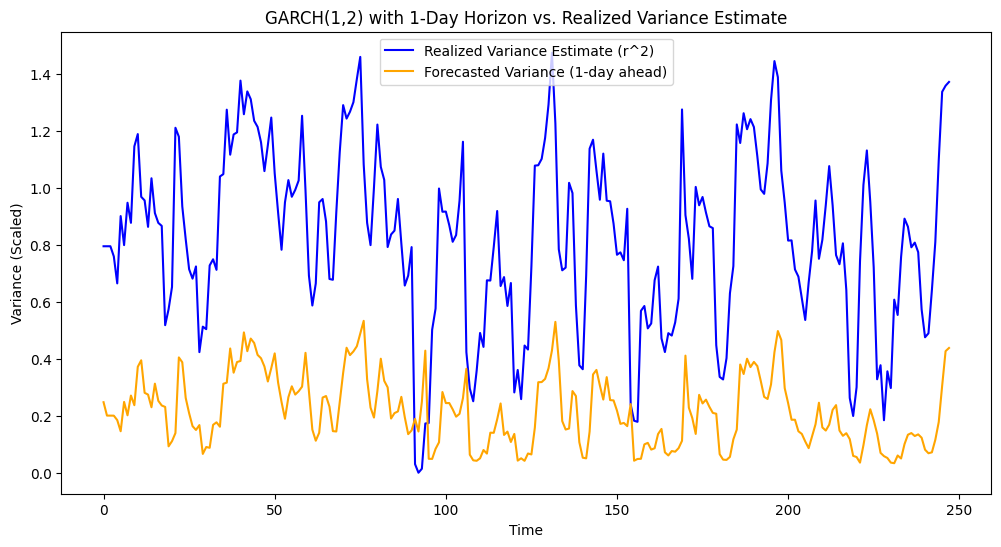

[13 Remaining] Getting out-of-sample GARCH Forecast for ADBE...
MSE = 0.374831215845314


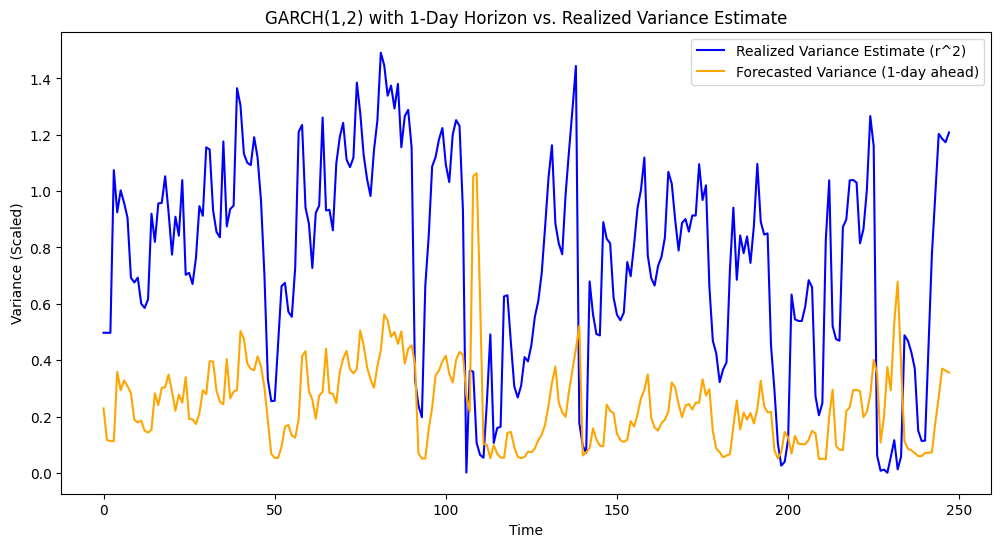

[12 Remaining] Getting out-of-sample GARCH Forecast for CRM...
MSE = 0.5057929089423664


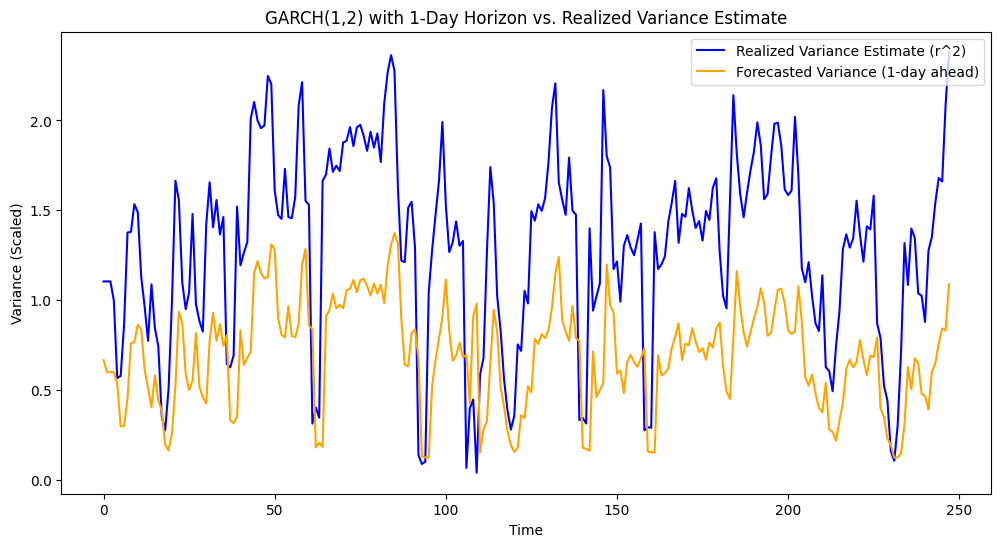

[11 Remaining] Getting out-of-sample GARCH Forecast for MA...
MSE = 0.34587689474918354


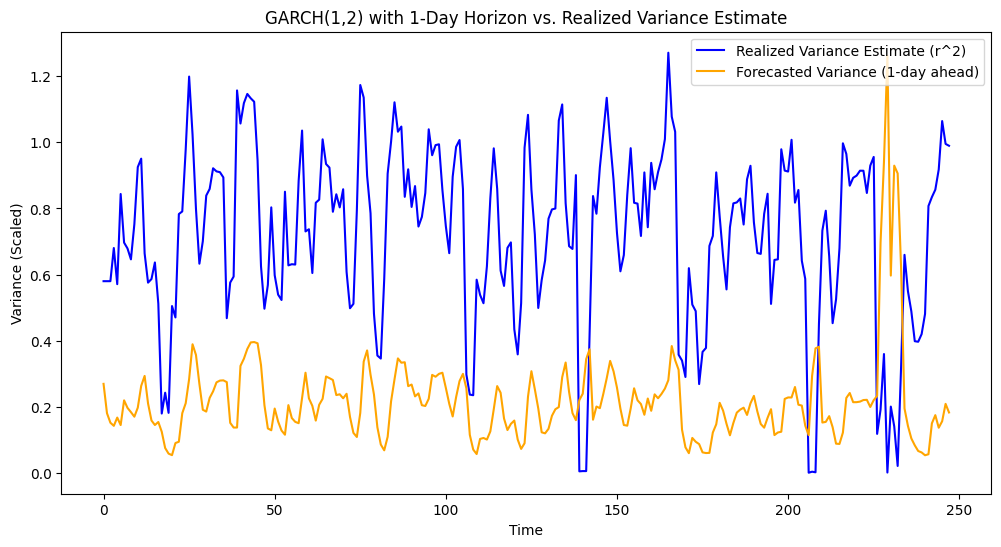

[10 Remaining] Getting out-of-sample GARCH Forecast for XLRE...
MSE = 0.010725565207925038


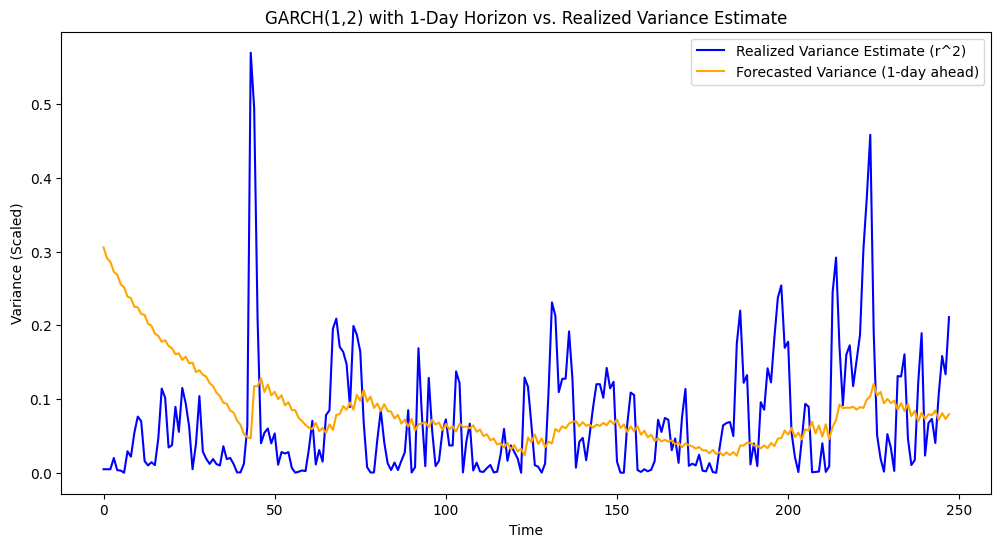

[9 Remaining] Getting out-of-sample GARCH Forecast for SPY...
MSE = 0.4460842883799799


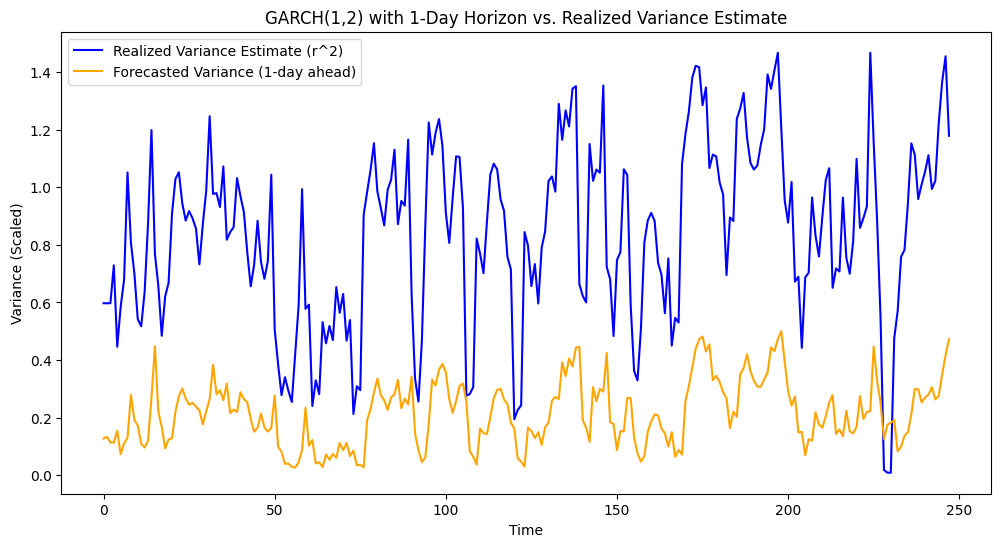

[8 Remaining] Getting out-of-sample GARCH Forecast for XLY...
MSE = 0.3251790622468792


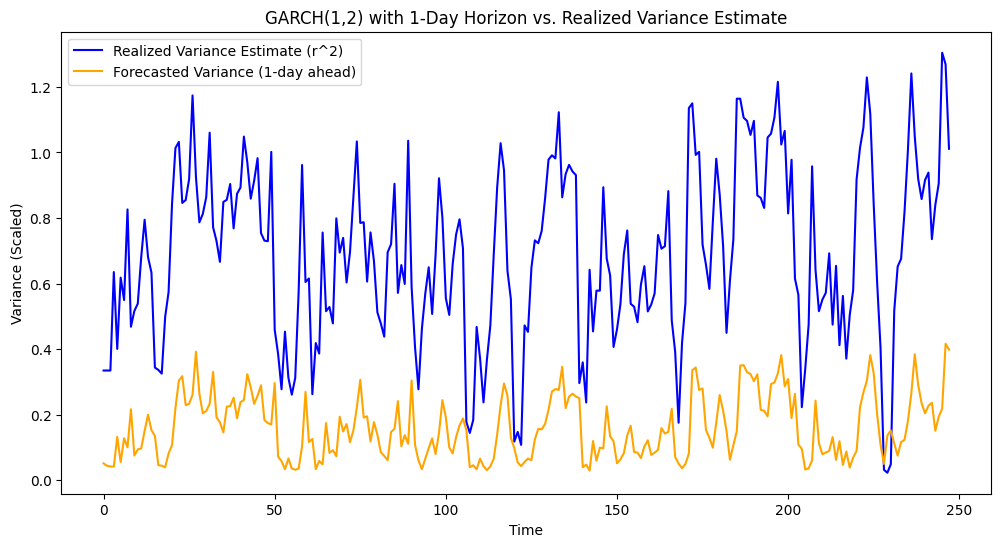

[7 Remaining] Getting out-of-sample GARCH Forecast for XLU...
MSE = 0.13170570629824913


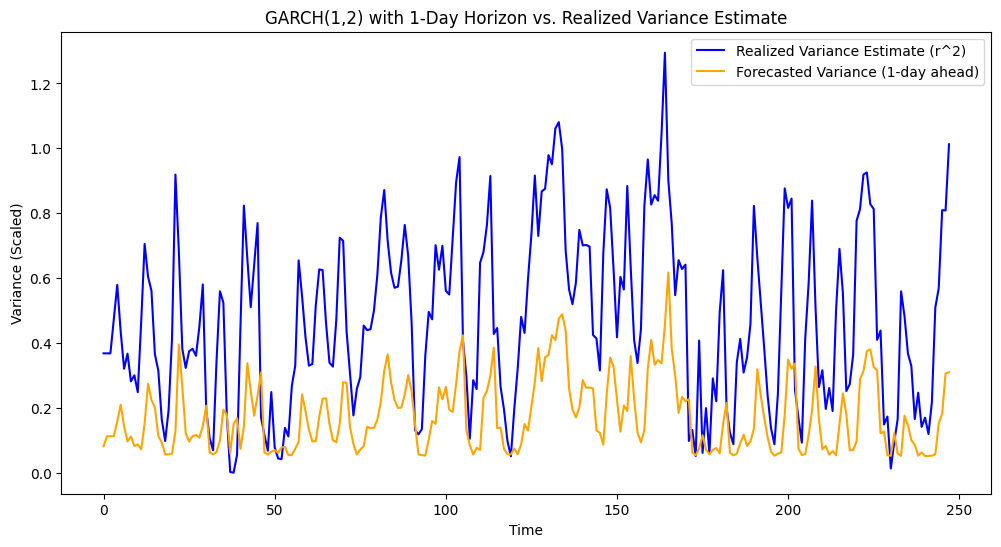

[6 Remaining] Getting out-of-sample GARCH Forecast for XLF...


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


MSE = 0.11561317278998347


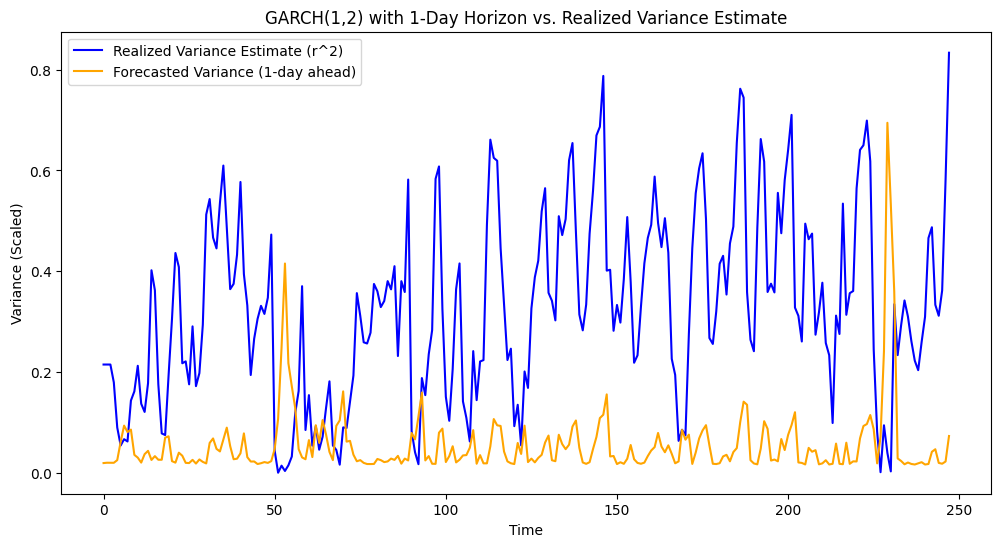

[5 Remaining] Getting out-of-sample GARCH Forecast for XLV...
MSE = 0.2541738245051445


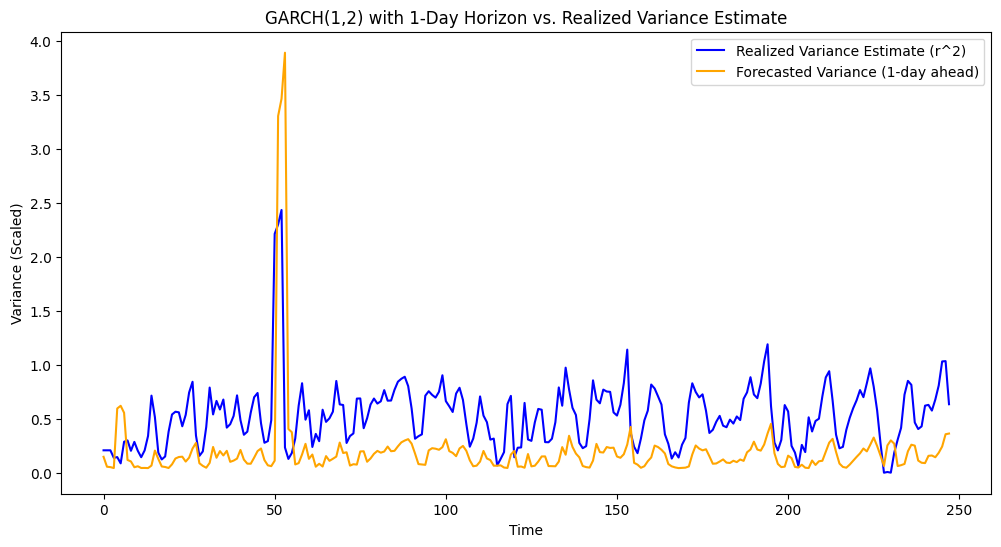

[4 Remaining] Getting out-of-sample GARCH Forecast for NVDA...
MSE = 0.42579725207997454


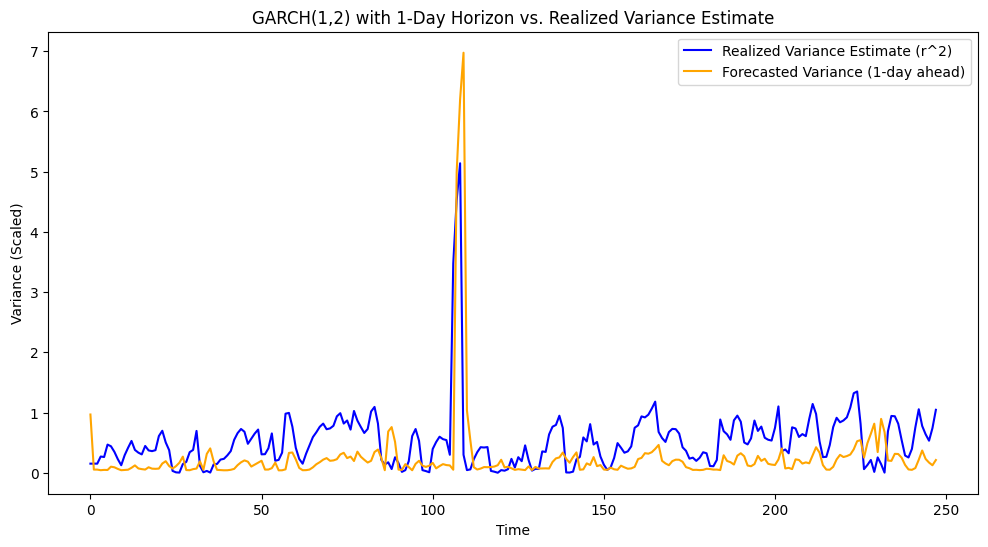

[3 Remaining] Getting out-of-sample GARCH Forecast for MSFT...
MSE = 0.4599821585319438


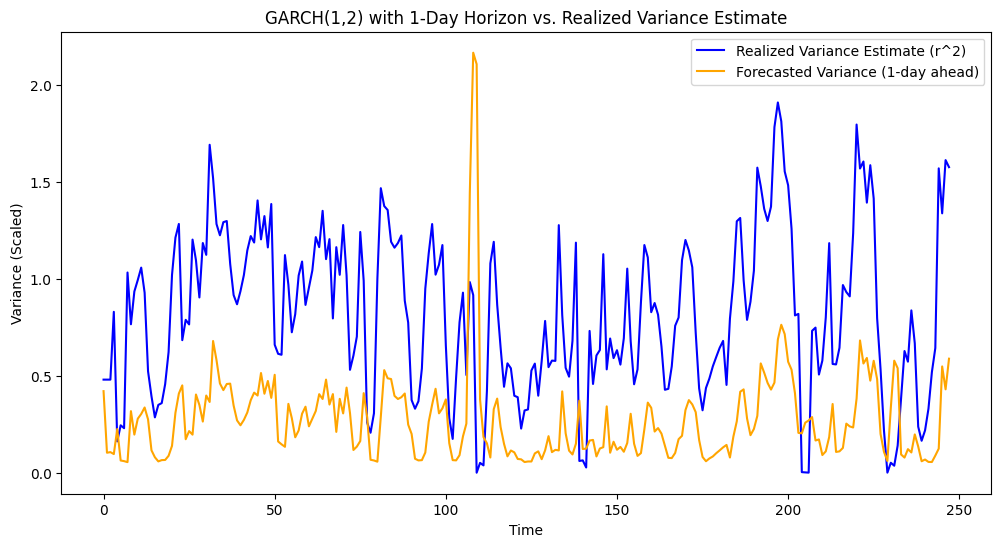

[2 Remaining] Getting out-of-sample GARCH Forecast for XLK...
MSE = 0.4117520819659405


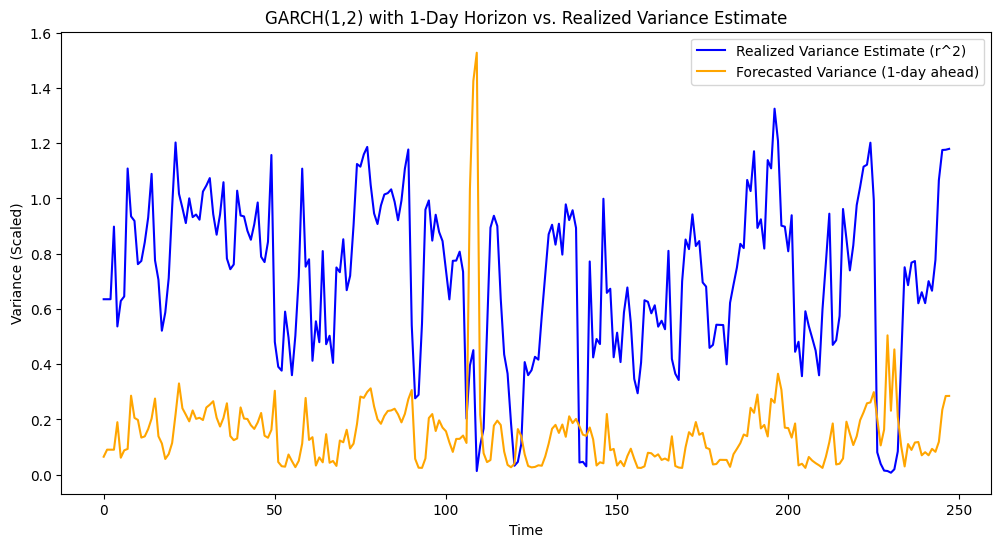

[1 Remaining] Getting out-of-sample GARCH Forecast for ACN...


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr

MSE = 0.022770231118994535


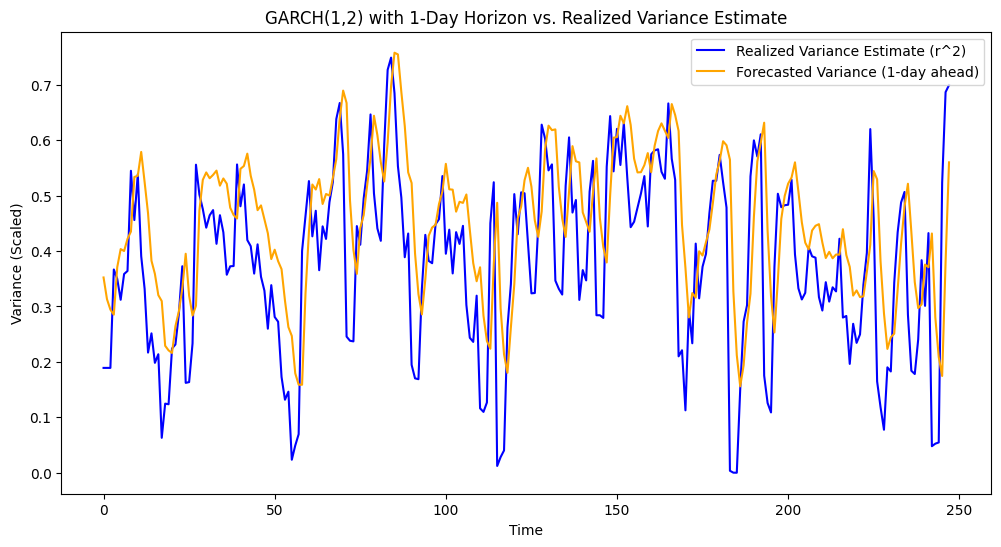

In [87]:
garch_manager = GARCHManager(dataset, 1, 2)
garch_manager.fit_garch_for_all_stocks()
garch_manager.get_in_sample_garch_values_for_all_stocks()
garch_manager.get_out_of_sample_garch_values_for_all_stocks()

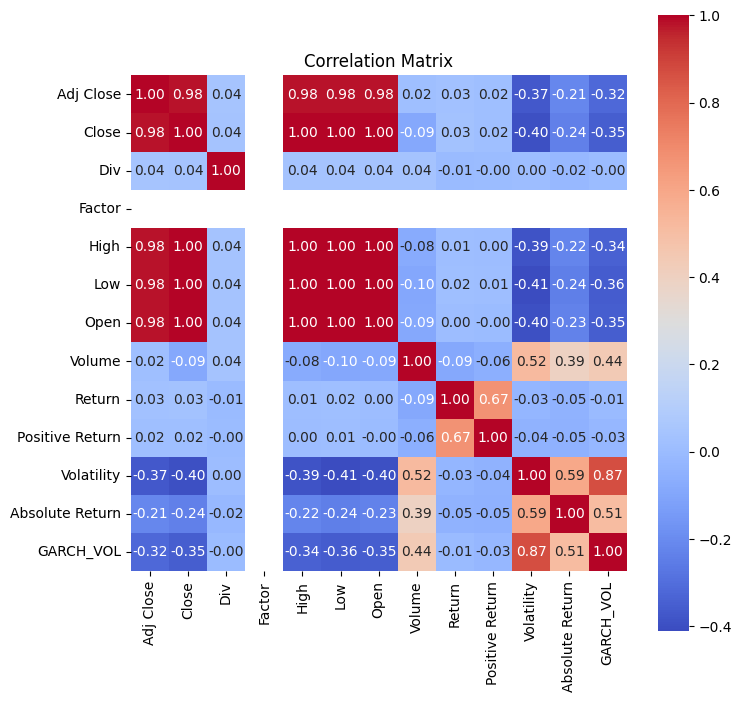

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for In Sample Data
data = dataset.train_set['SPY']
correlation_matrix = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


In [93]:
# Get the mean of the correlation of GARCH_VARIANCE between Absolute Return across all stocks.
garch_variance_corr = []
for ticker in dataset.train_set.keys():
  garch_variance_corr.append(dataset.train_set[ticker]['GARCH_VOL'].corr(dataset.train_set[ticker]['Absolute Return']))
print(f"Mean: {np.mean(garch_variance_corr)}")

# Do the same for Volatility
volatility_corr = []
for ticker in dataset.train_set.keys():
  volatility_corr.append(dataset.train_set[ticker]['Volatility'].corr(dataset.train_set[ticker]['GARCH_VOL']))
print(f"Mean: {np.mean(volatility_corr)}")

Mean: 0.3928967505582706
Mean: 0.8014871824385402


The correlation between the GARCH estimates and the actual Absolute/Squared Return is not high. Nonetheless it's a measure that can be obtained purely based on past data and could be used to estimate the magnitude of the return on the next day.

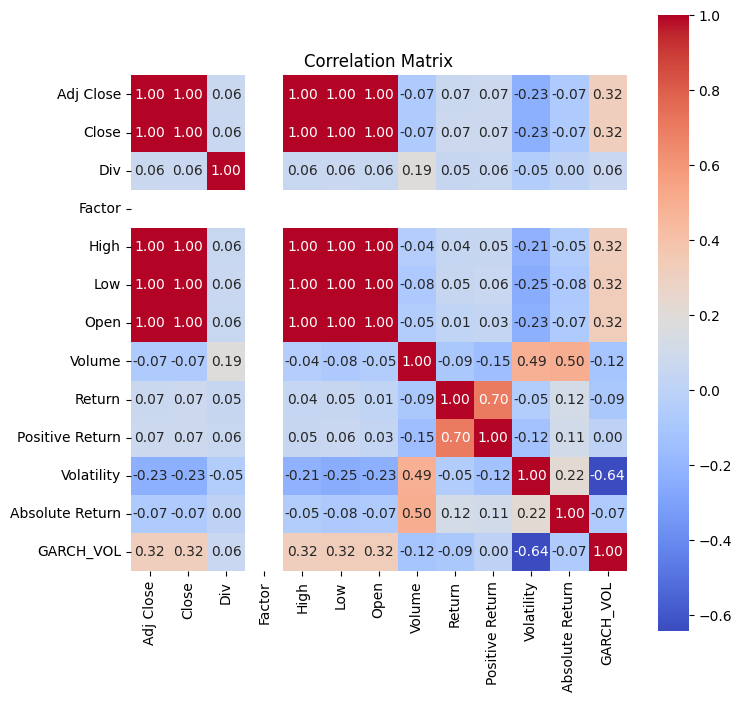

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for Out of Sample Data
data = dataset.sample_set['SPY']
correlation_matrix = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


In [101]:
# Get the mean of the correlation of GARCH_VARIANCE between Absolute Return across all stocks.
garch_variance_corr = []
for ticker in dataset.sample_set.keys():
  garch_variance_corr.append(dataset.sample_set[ticker]['GARCH_VOL'].corr(dataset.sample_set[ticker]['Absolute Return']))
print(f"Mean: {np.median(garch_variance_corr)}")

# Do the same for Volatility
volatility_corr = []
for ticker in dataset.sample_set.keys():
  volatility_corr.append(dataset.sample_set[ticker]['Volatility'].corr(dataset.sample_set[ticker]['GARCH_VOL']))
print(f"Mean: {np.median(volatility_corr)}")

# Do the same for Volatility
volatility_corr = []
for ticker in dataset.sample_set.keys():
  volatility_corr.append(dataset.sample_set[ticker]['Absolute Return'].corr(dataset.sample_set[ticker]['Volatility']))
print(f"Mean (Correlation between Abs. Return and Volatility): {np.median(volatility_corr)}")

Mean: -0.06668668864248689
Mean: -0.27373665989232226
Mean (Correlation between Abs. Return and Volatility): 0.3301636291463837


#### The GARCH volatility forecast has some correlation with the Volatility, which has some correlation with the magnitude of the return (Absolute Return)... However unlike any other features, the GARCH volatility forecast completely depends on past values and can be obtained at t-1.

# 5. Stock Direction Rolling Prediction using Univariate Temporal Convolutional Network (TCN)

Set up a CNN with 3 stacked TCN blocks, the target value is "Positive Return" and it is a classification network.

In [13]:
from typing import Tuple
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, LayerNormalization, Activation
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import pandas as pd
from typing import Tuple, List

# Check for GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

def prepare_data_for_training(stock_data, seq_length, scaler=None, forecast_horizon=1):
    targets = stock_data[['Positive Return']]
    if not scaler:
      scaler = StandardScaler()
      scaler.fit(stock_data.values)
      scaled_data = scaler.transform(stock_data)
    else:
      scaled_data = scaler.transform(stock_data)


    X_sequences = []
    y_targets = []

    for i in range(seq_length, len(scaled_data)):
      X_sequences.append(scaled_data[i - seq_length:i])
      y_targets.append(targets[i + forecast_horizon - 1, 1])

    assert len(X_sequences) == len(y_targets)

    df = pd.DataFrame({
        'X': X_sequences,
        'y': y_targets
    })

    return (
        np.array(df['X']),
        np.array(df['y']),
        scaler
    )

class TCNBlock(tf.keras.layers.Layer):
    def __init__(self, n_filters: int, kernel_size: int, dilation_rate: int, dropout_rate: float = 0.2):
        super(TCNBlock, self).__init__()
        self.n_filters = n_filters
        self.conv1 = Conv1D(
            filters=n_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding='causal'
        )
        self.layernorm1 = LayerNormalization()
        self.activation1 = Activation('relu')
        self.dropout1 = Dropout(dropout_rate)

        self.conv2 = Conv1D(
            filters=n_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding='causal'
        )
        self.layernorm2 = LayerNormalization()
        self.activation2 = Activation('relu')
        self.dropout2 = Dropout(dropout_rate)

    def build(self, input_shape):
        self.residual = Conv1D(filters=self.n_filters, kernel_size=1) if self.n_filters != input_shape[-1] else None
        super(TCNBlock, self).build(input_shape)

    def call(self, inputs, training=None):
        x = self.conv1(inputs)
        x = self.layernorm1(x)
        x = self.activation1(x)
        x = self.dropout1(x, training=training)

        x = self.conv2(x)
        x = self.layernorm2(x)
        x = self.activation2(x)
        x = self.dropout2(x, training=training)

        if self.residual is not None:
            residual = self.residual(inputs)
        else:
            residual = inputs

        return x + residual

def create_tcn_model(
    seq_length: int,
    n_features: int,
    n_filters: List[int] = [32, 64, 128],
    kernel_size: int = 2,
    dropout_rate: float = 0.2,
    learning_rate: float = 0.001
) -> tf.keras.Model:
    """
    Create a TCN model with specified parameters
    """
    inputs = Input(shape=(seq_length, n_features))
    x = inputs

    # TCN blocks with different dilation rates
    for i, filters in enumerate(n_filters):
        dilation_rate = 2**i  # Exponentially increasing dilation rates: 1, 2, 4
        x = TCNBlock(
            n_filters=filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            dropout_rate=dropout_rate
        )(x)

    # Output layer
    x = Dense(1, activation='sigmoid')(x[:, -1, :])  # Use the last timestep for binary classification

    model = Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )

    return model

def train_model_with_cv(train_set, sample_set, stock_symbol):
    """
    Train the TCN model
    """
    # Model parameters
    seq_length = 20
    forecast_horizon = 1
    test_size = 0.2

    # Get data from NDX dictionary
    train_set = train_set[['Adj Close', 'Volume', 'Volatility', 'Return', 'Positive Return']]
    sample_set = sample_set[['Adj Close', 'Volume', 'Volatility', 'Return', 'Positive Return']]

    # Prepare data
    X_train, y_train, scaler = prepare_data_for_training(train_set, seq_length, None, forecast_horizon)
    X_test, y_test, _ = prepare_data_for_training(train_set, seq_length, scaler, forecast_horizon)

    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)


    # Create and train model
    model = create_tcn_model(
        seq_length=seq_length,
        # for now, just use features Adj Close, Volume, Volatility, today's GARCH forecast, today's Return,
        # today's Positive Return Boolean, and target is tomorrow's Positive Return Bool.
        n_features=5,
        n_filters=[32, 64, 128],
        kernel_size=2,
        dropout_rate=0.2,
        learning_rate=0.001
    )

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            f'best_tcn_model_{stock_symbol}.keras',
            save_best_only=True,
            monitor='val_loss'
        )
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'TCN Model Training History - {stock_symbol}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate model
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Loss (MSE): {test_loss[0]:.4f}")
    print(f"Test MAE: {test_loss[1]:.4f}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Inverse transform predictions for visualization
    y_pred_orig = np.zeros((len(y_pred), 2))
    y_pred_orig[:, 1] = y_pred.flatten()
    y_pred_orig = scaler.inverse_transform(y_pred_orig)[:, 1]

    y_test_orig = np.zeros((len(y_test), 2))
    y_test_orig[:, 1] = y_test
    y_test_orig = scaler.inverse_transform(y_test_orig)[:, 1]

    # Plot predictions vs actual
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_orig, label='Actual Value')
    plt.plot(y_pred_orig, label='Predicted Value')
    plt.title(f'Value Forecasting Results - {stock_symbol}')
    plt.xlabel('Time')
    plt.ylabel('Actual Value')
    plt.legend()
    plt.show()

    return model, scaler, (y_test_orig, y_pred_orig)

# Execute training for multiple stocks
def train_stock(train_set, test_set, stock_symbol):
    print(f"\nTraining model for {stock_symbol}")
    model, scaler, (y_test, y_pred) = train_model_with_cv(
        train_set, test_set, stock_symbol
    )
    results = {
        'model': model,
        'scaler': scaler,
        'mse': np.mean((y_test - y_pred) ** 2),
        'mae': np.mean(np.abs(y_test - y_pred))
    }
    print(results)

train_stock(
    dataset.train_set['SPY'],
    dataset.sample_set['SPY'],
    'SPY'
)

GPU Available:  []

Training model for SPY


TypeError: train_model_with_cv() missing 1 required positional argument: 'stock_symbol'

# 5. Holdout Data

## Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will restore your model from the saved file`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [ ]:
raise NotImplementedError
holdout_dir = os.path.join(".", "Data", "holdout")
predicts = MyModel(holdout_dir, model_save_file)

In [ ]:
print("Done")